In [18]:
#import dependencies
import pandas as pd
from pathlib import Path
from datetime import datetime
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots


In [19]:
csv_file = Path("Resources/cleaned_ufo_au.csv")
TODdf = pd.read_csv(csv_file)
TODdf.head()

,country,state,city,shape,duration_hours,duration_minutes,duration_seconds,comments,date_posted,latitude,longitude,date,time
0,au,New South Wales,sydney (nsw&#44 australia),formation,0.050000,3.0,180.0,formation and impact,20/11/2001,-33.861481,151.205475,10/10/2001,4:33:00
1,au,South Australia,adelaide (pt. wakefield) (south australia),circle,0.166667,10.0,600.0,one light became 3,28/10/2002,-34.928661,138.598633,10/10/2002,4:00:00
2,au,Tasmania,burnie (tasmania) (australia),cross,0.000000,0.0,0.0,the craft was large and noisy,13/07/2005,-41.055840,145.903748,10/10/2002,22:00:00
3,au,South Australia,adelaide (south australia),oval,0.083333,5.0,300.0,Dancing &amp; Flashing UFO in Glenelg&#44 Sout...,8/10/2007,-34.928661,138.598633,1/10/2007,2:00:00
4,au,Western Australia,perth (w. of; southern cross) (western australia),fireball,0.250000,15.0,900.0,fire ball and min min,18/06/2004,-31.952240,115.861397,12/10/1975,1:00:00


In [20]:
#create df for chart 
c_columns = ['state','time']
TOD_chart_df = TODdf[c_columns].copy()
print(TOD_chart_df)


                 state      time
0      New South Wales   4:33:00
1      South Australia   4:00:00
2             Tasmania  22:00:00
3      South Australia   2:00:00
4    Western Australia   1:00:00
..                 ...       ...
572    New South Wales  23:35:00
573  Western Australia   2:30:00
574    New South Wales  19:30:00
575         Queensland  19:32:00
576           Victoria  19:01:00

[577 rows x 2 columns]


In [21]:
#group data by state and time
TOD_counts_df = TOD_chart_df.groupby(['state', 'time']).size().reset_index(name='count')
print(TOD_counts_df)

                            state      time  count
0    Australian Capital Territory  13:00:00      2
1    Australian Capital Territory  13:40:00      1
2    Australian Capital Territory  17:00:00      1
3    Australian Capital Territory  18:35:00      1
4    Australian Capital Territory  19:00:00      1
..                            ...       ...    ...
360             Western Australia   6:10:00      1
361             Western Australia   6:33:00      1
362             Western Australia   7:30:00      1
363             Western Australia   8:00:00      1
364             Western Australia   9:00:00      1

[365 rows x 3 columns]


In [22]:
#convert time to datetime format
TOD_counts_df['time'] = pd.to_datetime(TOD_counts_df['time'])
print(TOD_counts_df)

                            state                time  count
0    Australian Capital Territory 2023-07-10 13:00:00      2
1    Australian Capital Territory 2023-07-10 13:40:00      1
2    Australian Capital Territory 2023-07-10 17:00:00      1
3    Australian Capital Territory 2023-07-10 18:35:00      1
4    Australian Capital Territory 2023-07-10 19:00:00      1
..                            ...                 ...    ...
360             Western Australia 2023-07-10 06:10:00      1
361             Western Australia 2023-07-10 06:33:00      1
362             Western Australia 2023-07-10 07:30:00      1
363             Western Australia 2023-07-10 08:00:00      1
364             Western Australia 2023-07-10 09:00:00      1

[365 rows x 3 columns]


In [23]:
TOD_counts_df['time_bracket'] = TOD_counts_df['time'].dt.floor('H').dt.time
print(TOD_counts_df)

                            state                time  count time_bracket
0    Australian Capital Territory 2023-07-10 13:00:00      2     13:00:00
1    Australian Capital Territory 2023-07-10 13:40:00      1     13:00:00
2    Australian Capital Territory 2023-07-10 17:00:00      1     17:00:00
3    Australian Capital Territory 2023-07-10 18:35:00      1     18:00:00
4    Australian Capital Territory 2023-07-10 19:00:00      1     19:00:00
..                            ...                 ...    ...          ...
360             Western Australia 2023-07-10 06:10:00      1     06:00:00
361             Western Australia 2023-07-10 06:33:00      1     06:00:00
362             Western Australia 2023-07-10 07:30:00      1     07:00:00
363             Western Australia 2023-07-10 08:00:00      1     08:00:00
364             Western Australia 2023-07-10 09:00:00      1     09:00:00

[365 rows x 4 columns]


In [28]:
# Group the data by state and time bracket and calculate the count of sightings
grouped_data = TOD_counts_df.groupby(['state', 'time_bracket']).sum().reset_index()

# Create dropdown options for states including "All States"
dropdown_options = ['All States'] + grouped_data['state'].unique().tolist()

# Create figure
fig = go.Figure()

# Add traces for each state
for state in dropdown_options:
    if state == 'All States':
        state_data = grouped_data.groupby('time_bracket')['count'].sum().reset_index()
        name = state
    else:
        state_data = grouped_data[grouped_data['state'] == state]
        name = state
    fig.add_trace(go.Scatter(
        x=state_data['time_bracket'],
        y=state_data['count'],
        mode='lines+markers',
        name=name,
        visible=(state == 'All States')
    ))

# Update layout
fig.update_layout(
    title='Sightings by Time Bracket',
    xaxis_title='Time Bracket',
    yaxis_title='Count',
    showlegend=True,
    updatemenus=[
        dict(
            buttons=[
                dict(
                    label=state,
                    method='update',
                    args=[{'visible': [state == trace.name or state == 'All States' for trace in fig.data]}],
                )
                for state in dropdown_options
            ],
            direction="down",
            showactive=True,
            x=0.1,
            y=1.15
        )
    ]
)

# Show the figure and save as a html file
fig.write_html('TOD.html')
fig.show()



C:\Users\Kirsty Armstrong\AppData\Local\Temp\ipykernel_25548\1867775493.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [15]:
#remove date from timie column
TOD_counts_df['time'] = TOD_counts_df['time'].dt.strftime('%H:%M:%S')
print(TOD_counts_df)

                            state      time  count
0    Australian Capital Territory  13:00:00      2
1    Australian Capital Territory  13:40:00      1
2    Australian Capital Territory  17:00:00      1
3    Australian Capital Territory  18:35:00      1
4    Australian Capital Territory  19:00:00      1
..                            ...       ...    ...
360             Western Australia  06:10:00      1
361             Western Australia  06:33:00      1
362             Western Australia  07:30:00      1
363             Western Australia  08:00:00      1
364             Western Australia  09:00:00      1

[365 rows x 3 columns]


In [17]:
TOD_counts_df['time_bracket'] = TOD_counts_df['time'].dt.floor('H').dt.time
print(TOD_counts_df)

AttributeError: Can only use .dt accessor with datetimelike values

In [12]:
# Group the data by time and calculate the count for each time slot to create a line chart of count by hour of day 
#time_counts = TOD_counts_df.groupby(TOD_counts_df['time'].dt.hour).size()
#print(time_counts)


time
0     18
1     19
2     19
3     11
4      8
5      7
6      9
7      5
8      9
9      6
10     9
11     8
12    12
13    10
14     9
15     6
16    12
17    12
18    19
19    26
20    41
21    29
22    31
23    30
dtype: int64


In [16]:

# Create drop down options
dropdown_options = TOD_counts_df['state'].unique()

# Define colors and markers
colors = ['red', 'blue', 'green', 'orange', 'grey', 'purple', 'black', 'fuchsia']
markers = ['circle', 'circle', 'circle', 'circle', 'circle', 'circle', 'circle']

# Create figure
fig = go.Figure()

# Add traces for each state
for i, state in enumerate(dropdown_options):
    state_data = TOD_counts_df[time_counts['state'] == state]
    fig.add_trace(go.Scatter(
        x=state_data['time'],
        y=state_data['count'],
        mode='lines+markers',
        name=state,
        line=dict(color=colors[i % len(colors)]),
        marker=dict(symbol=markers[i % len(markers)], size=8)
    ))

# Define callback function
def update_graph(selected_state):
    visible_states = [state == selected_state for state in dropdown_options]
    fig.update_traces(visible=visible_states)

# Create dropdown menu
dropdown_buttons = []
for state in dropdown_options:
    dropdown_buttons.append(
        dict(
            label=state,
            method='update',
            args=[{'visible': [state == s for s in dropdown_options]}],
        )
    )

# Update layout
fig.update_layout(
    title='Sightings by State and Time of Day',
    xaxis_title='Time of Day (hour)',
    yaxis_title='Total Sightings',
    showlegend=False,
    updatemenus=[dict(active=0, buttons=dropdown_buttons)]
)

# Export the graph as HTML file
fig.write_html('TOD.html')


KeyError: 'state'

In [9]:
# Create figure and subplot
fig = make_subplots(rows=1, cols=1)
dropdown_options = time_counts['state'].unique()

# Define colors and markers
colors = ['red', 'blue', 'green', 'orange', 'grey', 'purple', 'black', 'fuchsia']
markers = ['circle', 'circle', 'circle','circle', 'circle', 'circle','circle']

# Add traces for each state
traces = []  # Initialize traces list
for i, state in enumerate(dropdown_options):
    x = time_counts[time_counts['time'] == state]['time']
    y = time_counts[time_counts['count'] == state]['count']
    trace = go.Scatter(
        x=x,
        y=y,
        mode='lines+markers',
        name=state,
        line=dict(color=colors[i % len(colors)]),
        marker=dict(symbol=markers[i % len(markers)], size=8)
    )
    fig.add_trace(trace)
    traces.append(trace)

# Define callback function
def update_graph(selected_state):
    for trace in traces:
        visible = trace.name == selected_state
        trace.visible = visible

# Create dropdown menu
dropdown_buttons = []
for state in dropdown_options:
    dropdown_buttons.append(
        dict(
            label=state,
            method='update',
            args=[{'visible': [trace.name == state for trace in traces]}],
        )
    )

fig.update_layout(
    title='Sightings by State and Time of Day',
    xaxis_title='Time of Day (hour)',
    yaxis_title='Total Sightings',
    showlegend=False,
    updatemenus=[dict(active=0, buttons=dropdown_buttons)]
)

# Export the graph as HTML file
fig.write_html('TOD.html')

KeyError: 'state'

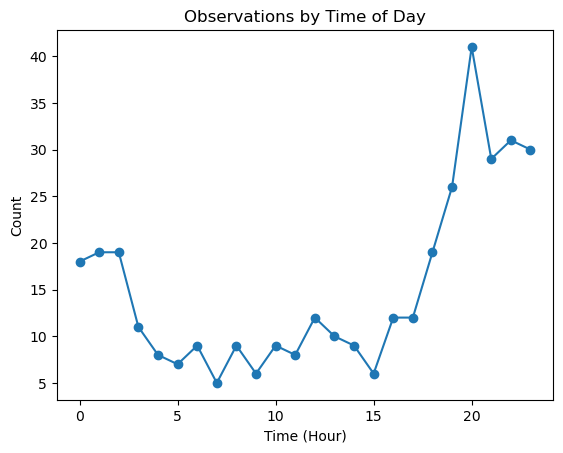

In [20]:
# Create a line chart
plt.plot(time_counts.index, time_counts.values, marker='o')

# Set the chart title and axes labels
plt.title("Observations by Time of Day")
plt.xlabel("Time (Hour)")
plt.ylabel("Count")

plt.savefig ('Time_of_day.png')
# Show the line chart as 
plt.show()